In [1]:
import cf_xarray
import gribberish
import xarray as xr
import cfgrib

ds = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='gribberish')

gust = ds['GUST@groundorwater_0']
gust

ds_truth = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})
gust_truth = ds_truth.gust

/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
dlopen(/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so, 0x0002): Library not loaded: /opt/homebrew/opt/gdal/lib/libgdal.31.dylib
  Referenced from: <096C1844-80F2-3F2D-82B6-4FA692E96B85> /Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so
  Reason: tried: '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/usr/local/lib/libgdal.31.dylib' (no such file), '/usr/lib/libgdal.31.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/gdal/3.6.2/lib/libgdal.31.dylib' (no such file), '/S

In [2]:
print(f'truth: {float(gust_truth.sel(latitude=41, longitude=-71, method="nearest").values)}')
print(f'compare: {float(gust.sel(lat=41, lon=-71, method="nearest").values)}')
print('-----')
print(f'truth: {float(gust_truth.isel(latitude=0, longitude=2).values)}')
print(f'compa: {float(gust.isel(lat=0, lon=2).values)}')

truth: 10.422778129577637
compare: 10.422778330743313
-----
truth: 5.522778511047363
compa: 5.522778330743313


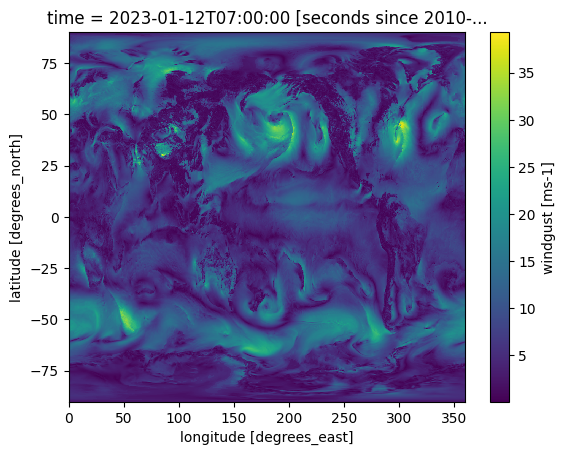

In [4]:
gust.plot()